## Полезные ссылки

**Начало работы**

- Anaconda (дистрибутив для Python, содержащий в том числе Jupyter Notebook и сам Python): https://www.anaconda.com/download/ - рекомендуется версия Python 3.6 или больше; не забудьте выбрать нужную операционную систему!
- документация по Jupyter: https://jupyter.readthedocs.io/en/latest/
- документация по pip (для установки пакетов в Python с помощью pip install): https://pip.readthedocs.io/en/latest/
- PyCharm: https://www.jetbrains.com/pycharm/

**Общее**

- для любых вопросов: https://www.google.com/
- для (почти) любых ответов: https://stackoverflow.com/
- [a professional information and analytical resource dedicated to machine learning, pattern recognition, and data mining](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B8%D1%86%D0%B0)
- A visual introduction to machine learning: http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

**Python & Jupyter**

- A Crash Course in Python for Scientists: http://nbviewer.jupyter.org/gist/rpmuller/5920182
- A Gallery of interesting Jupyter Notebooks: https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks
- Markdown Cheatsheet: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

**pandas**

- документация: http://pandas.pydata.org/pandas-docs/stable/
- 10 minutes to pandas: https://pandas.pydata.org/pandas-docs/stable/10min.html
- Pandas Tutorial: DataFrames in Python: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- Cheet Sheet: https://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/
- Visualization: http://pandas.pydata.org/pandas-docs/stable/visualization.html

**sklearn**

- документация и многое другое: http://scikit-learn.org/stable/

**Другие библиотеки**

- matplotlib: https://matplotlib.org/users/pyplot_tutorial.html
- seaborn: http://seaborn.pydata.org/

## Лабораторная работа 1: работа с Pandas.

Pandas - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов.

In [22]:
import pandas as pd

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двумерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series.

С помощью библиотеки Pandas займемся анализом данных. Будем работать с данными о клиентах банка, который интересуется, произойдет ли просрочка платежа на 90 и более дней при выдаче кредита. 

### 1
Прочтите данные из файла data.csv

*Функции, которые могут пригодиться при решении: `pd.read_csv(..., delimiter=',')`*

In [23]:
# место для кода
data_csv= pd.read_csv('data_full.csv', delimiter=',')

### 2
Выведите описание прочтенных данных. 

*Функции, которые могут пригодиться при решении: `.describe()`*

In [24]:
# место для кода
data_csv.describe()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### 3
Отобразите несколько первых и несколько последних записей.

*Функции, которые могут пригодиться при решении: `.head(), .tail()`*

*Какие параметры можно передать этим функциям?*

In [25]:
# место для кода
data_csv.head()


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
data_csv.tail()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


### 4
Прочтите в файле `DataDictionary-ru.txt`, что означают столбцы матрицы. Какому типу принадлежит каждый столбец (вещественный, целый, категориальный)?

In [27]:
# место для ответа
# SeriousDlqin2yrs - целый
# RevolvingUtilizationOfUnsecuredLines - вещ   
# age - целый
# NumberOfTime30-59DaysPastDueNotWorse - целый   
# DebtRatio - вещ
# MonthlyIncome - вещ
# NumberOfOpenCreditLinesAndLoans - цел
# NumberOfTimes90DaysLate -цел
# NumberRealEstateLoansOrLines - цел
# NumberOfTime60-89DaysPastDueNotWorse -цел   
# NumberOfDependents -цел

### 5

Заметьте, что столбец `DebtRatio` содержит неправдоподобные данные. Только значения, соответствующие известному месячному доходу, являются отношениями. Остальные – абсолютные значения месячных выплат процентов. 

Исправьте данные, сделав все значения столбца `DebtRatio` абсолютными (умножьте их на `MonthlyIncome`).  Чтобы ваша программа быстро работала на полных данных, постарайтесь не использовать цикл.

#### *Функции, которые могут пригодиться при решении:*

Обращение к элементам DataFrame:
  * элемент: `data.loc[i, 'названиеСтолбца']`
  * столбец: `data['названиеСтолбца']`
  * подматрица: `data.loc[a:b, списокНазванийСтолбцов]`

Условная индексация:
* `data.loc[data['столбец'] > 20, списокНазванийСтолбцов]`

лучше писать так:

* `i = data['столбец'] > 20`  # вектор `True` и `False`
* `data.loc[i, 'названиеСтолбца']`

У подматриц номера строк наследуются от исходной.

* `pandas.isnull(скаляр или массив)` - проверка, является ли значение неопределенным (`NaN`)
* `pandas.notnull(скаляр или массив)` - проверка, является ли значение определенным (не `NaN`)

In [28]:
# место для кода
df = data_csv
tmp = pd.notnull(df['MonthlyIncome'])
df.loc[tmp, 'DebtRatio'] *= df.loc[tmp,'MonthlyIncome']


In [29]:
df.tail()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,472.774869,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,4001.283436,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,2038.750092,8158.0,8,0,2,0,0.0


### 6

Поменяйте имя столбца на `Debt`.

*Функции, которые могут пригодиться при решении: `.rename(columns={'староеИмя':'новоеИмя'}, inplace=True)`*

In [30]:
# место для кода
df.rename(columns={'DebtRatio':'Debt'}, inplace=True)
df.tail()

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,Debt,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,472.774869,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,4001.283436,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,2038.750092,8158.0,8,0,2,0,0.0


### 7

Вычислите средний ежемесячный доход и присвойте всем клиентам с неизвестным доходом полученное число.

*Функции, которые могут пригодиться при решении: `.mean()`*

*Другие описательные статистики:* https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [31]:
# место для кода
tmp = pd.isnull(df['MonthlyIncome'])
df.loc[tmp, 'MonthlyIncome']= df['MonthlyIncome'].mean()

### 8

Используя метод `groupby`, оцените вероятности невозврата кредита (`SeriousDlqin2yrs=1`) для различных значений количества иждивенцев (`NumberOfDependents`).  

Проделайте аналогичную процедуру для различных значений столбца `NumberRealEstateLoansOrLines`

*Подсказка:*
`data['столбец1'].groupby(data['столбец2']).mean()`  *-- расчет средних значений столбца1 по группам из столбца2*

In [32]:
df['NumberOfDependents']==1

0         False
1          True
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Name: NumberOfDependents, Length: 150000, dtype: bool

In [33]:
# место для кода
for i in range(1,6):

    print('Детей {}, должников {}'.format(i, df['SeriousDlqin2yrs'].groupby(df['NumberOfDependents']==i).mean()[1]))

Детей 1, должников 0.07352941176470588
Детей 2, должников 0.08113922753816208
Детей 3, должников 0.08826320784561847
Детей 4, должников 0.10377358490566038
Детей 5, должников 0.09115281501340483


## Визуализация данных

In [34]:
import matplotlib.pyplot as plt

#  функция, позволяющая выводить графики прямо в ноутбук
%matplotlib inline

Matplotlib позволяет удобно визуализировать табличные данные.

*Функции, которые могут пригодиться при решении:*

* Рисование:
   * `plt.plot(x, y)`  см. подробнее http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
   * `plt.show()`
   * `plt.scatter(x, y)` - график рассеяния, см. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
   * `plt.hist()` - гистограмма, см. http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist
* Рисование нескольких графиков на одном:

  `fig, ax = plt.subplots()
   ax.hist(...)
   ax.hist(...)
   plt.show()`
   
* Логарифмическая шкала:
    * `ax.set_xscale('log')`  или `ax.set_yscale('log')`
* Ограничение области графика:
    * `ax.axis([x1, x2, y1, y2])`


### 9a

Постройте график рассеяния на осях `age` и `Debt`. Cиним отметьте клиентов без серьезных задолженностей (`SeriousDlqin2yrs = 0`) и красным — должников (`SeriousDlqin2yrs = 1`).

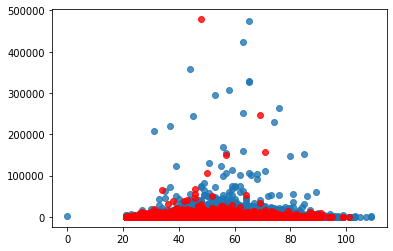

In [35]:
# место для кода
SeriousDlqin2yrs = df['SeriousDlqin2yrs']==1

plt.scatter(df[SeriousDlqin2yrs==False]['age'], df[SeriousDlqin2yrs==False]['Debt'],alpha=0.8)
plt.scatter(df[SeriousDlqin2yrs]['age'], df[SeriousDlqin2yrs]['Debt'], alpha=0.8, c='red')

plt.show()

### 9b
Постройте на одном графике две **нормированные** плотности распределения: красную – для месячного дохода клиентов с задолженностями, синюю – для месячного дохода клиентов без задолженностей. По оси абсцисс отобразите значения до 25000.

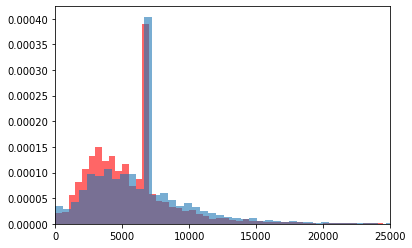

In [42]:
# место для кода

fig, ax = plt.subplots()
plt.xlim(None, 25000)

ax.hist(df.loc[SeriousDlqin2yrs,'MonthlyIncome'], color='red', alpha=0.6, density=True, bins=500)
ax.hist(df.loc[SeriousDlqin2yrs==False,'MonthlyIncome'], alpha=0.6, density=True, bins = 5000)
plt.show()

### 9c*
Визуализируйте попарные зависимости между небинарными признаками `'age', 'MonthlyIncome', 'NumberOfDependents'`. Ограничьте при этом месячный доход значением 25000.

Какие закономерности вы можете наблюдать на получившихся графиках?

*Функции, которые могут пригодиться при решении: `pd.plotting.scatter_matrix()`*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe22963510>,
      dtype=object)

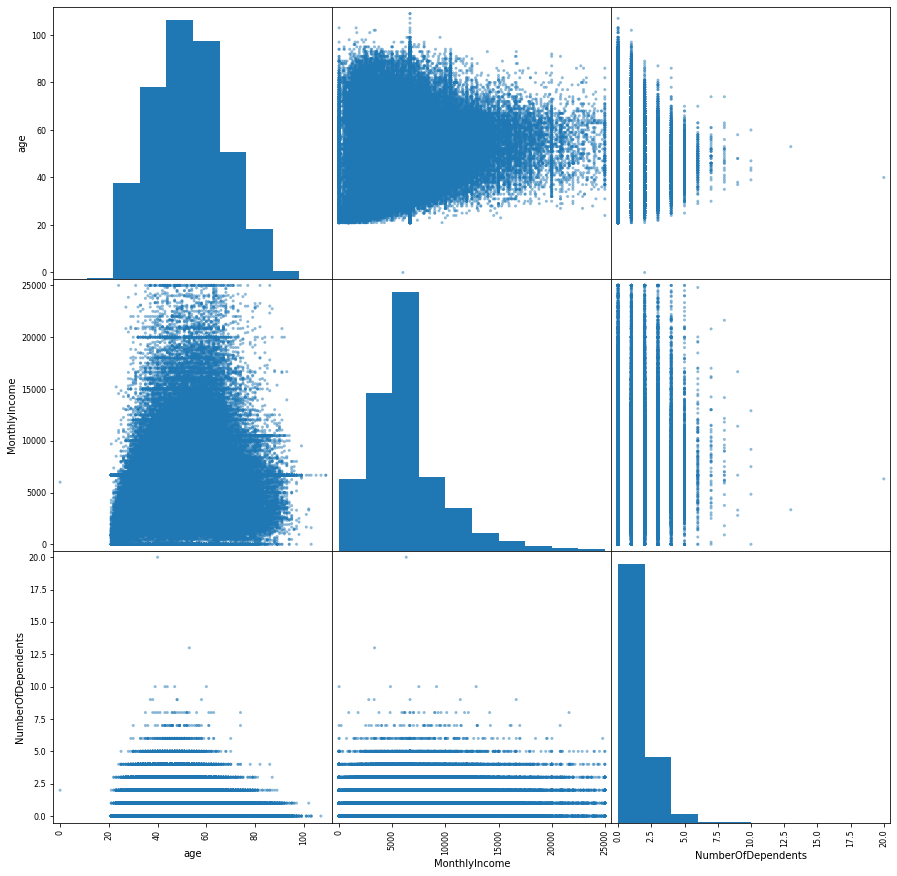

In [43]:
# место для кода
tmp=df['MonthlyIncome']<=25000
ds=df[tmp][['age','MonthlyIncome']]
pd.plotting.scatter_matrix(df[tmp][['age','MonthlyIncome','NumberOfDependents']], figsize=(15,15) )
#1) Возраст к иждивенцем: тендация содержать больше иждивенцев у людей среднего возраста (40-50)
#2) Возраст к месячному доходу: больше доходов люди получают среднего возраста 
#3) Доход к иждивенцем: бедные люди берут больше иждивенцев) 